In [11]:
import torch 
import matplotlib.pyplot as pl
import numpy as np
import cv2 

In [12]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/ahmedalmaqbali/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-14 Python-3.11.7 torch-2.2.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [13]:
imgs = ["/Users/ahmedalmaqbali/Desktop/Muaeen/Rihal/intern/repo/computerVision/roboflowData/vehicles.v2-release.yolov8/train/images/adit_mp4-790_jpg.rf.1dc91dd1d89d1a88496a50d41ccda765.jpg"]

In [14]:
results = model(imgs)

In [15]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 480x640 11 cars, 2 buss, 5 trucks
Speed: 12.0ms pre-process, 239.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)

In [16]:
results.print()

image 1/1: 480x640 11 cars, 2 buss, 5 trucks
Speed: 12.0ms pre-process, 239.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)


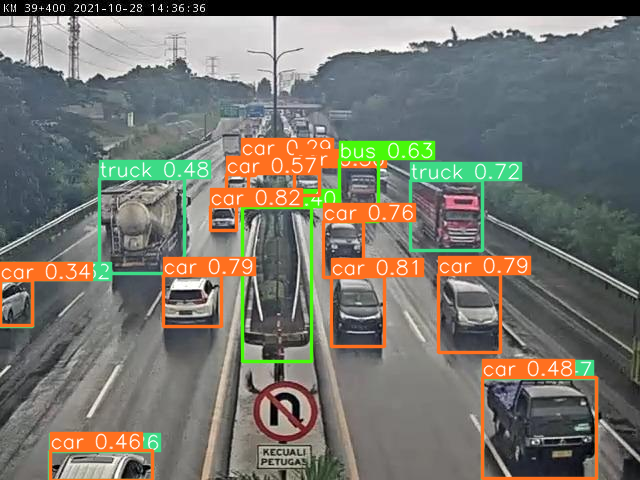

In [17]:
results.show()

In [18]:
results.xyxy[0]

tensor([[2.10780e+02, 2.06665e+02, 2.36284e+02, 2.30195e+02, 8.18169e-01, 2.00000e+00],
        [3.31652e+02, 2.76429e+02, 3.84245e+02, 3.46426e+02, 8.09533e-01, 2.00000e+00],
        [4.38695e+02, 2.74635e+02, 5.00267e+02, 3.52088e+02, 7.91859e-01, 2.00000e+00],
        [1.63278e+02, 2.75910e+02, 2.21267e+02, 3.26281e+02, 7.87592e-01, 2.00000e+00],
        [3.23121e+02, 2.21428e+02, 3.63553e+02, 2.77563e+02, 7.58090e-01, 2.00000e+00],
        [4.10252e+02, 1.80137e+02, 4.82053e+02, 2.50043e+02, 7.15562e-01, 7.00000e+00],
        [3.39239e+02, 1.59508e+02, 3.78150e+02, 2.21313e+02, 6.34129e-01, 5.00000e+00],
        [2.26805e+02, 1.74257e+02, 2.48714e+02, 2.01501e+02, 5.67319e-01, 2.00000e+00],
        [2.94522e+02, 1.67002e+02, 3.19414e+02, 1.95929e+02, 5.03695e-01, 2.00000e+00],
        [4.82547e+02, 3.77567e+02, 5.96586e+02, 4.79000e+02, 4.80471e-01, 2.00000e+00],
        [9.96902e+01, 1.78656e+02, 1.84770e+02, 2.73133e+02, 4.77112e-01, 7.00000e+00],
        [4.82588e+02, 3.78111e+0

In [19]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,210.780350,206.665314,236.284256,230.194672,0.818169,2,car
1,331.651825,276.428894,384.244598,346.425964,0.809533,2,car
2,438.694977,274.634521,500.266754,352.088379,0.791859,2,car
3,163.278168,275.909515,221.267303,326.281097,0.787592,2,car
4,323.121368,221.428360,363.552643,277.563416,0.758090,2,car
5,410.251526,180.137360,482.053284,250.043121,0.715562,7,truck
6,339.239380,159.508194,378.149902,221.313095,0.634129,5,bus
7,226.804565,174.256714,248.713684,201.501404,0.567319,2,car
8,294.522308,167.002228,319.414276,195.929016,0.503695,2,car
9,482.547150,377.567200,596.585938,478.999878,0.480471,2,car


In [20]:
# cap = cv2.VideoCapture('/Users/ahmedalmaqbali/Desktop/Muaeen/Rihal/intern/repo/computerVision/carCount.mp4')
# while cap.isOpened():
#     ret, frame = cap.read()

#     results = model(frame)

#     cv2.imshow('ANYTHING', np.squeeze(results.render()))

#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()
